In [1]:
import os, sys

if 'fpe_decoding' in os.path.dirname(os.getcwd()):
    sys.path.insert(1, os.path.dirname(os.getcwd()))
    os.chdir('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
from utils.optimization import csim_method, couple_by_distribution
from utils.utils import get_corrupted_ssp, generate_ssp_phases_plot, generate_ssp_similarity_plot

In [4]:
N = 512     # SSP dimension
x_dim = 2
radius = 5.

## Clean Up SSP Corrupted by Gaussian Noise

In [5]:
gaussian_noise = 1.5
A, corrupted_ssp, cleaned_ssp, x = get_corrupted_ssp(N, x_dim, loc_bds=radius, corruption_method='noise', noise=gaussian_noise)

In [6]:
print(corrupted_ssp)

[ 0.83532421-0.54975764j  0.98286116-0.18434732j  0.98078904+0.19507141j
 -0.68846296+0.72527151j -0.99198913+0.12632322j -0.84673004+0.53202279j
 -0.78284338-0.62221881j  0.01022804+0.99994769j  0.44439571+0.89583059j
 -0.80460758-0.5938069j  -0.25556249-0.96679254j  0.23904848-0.97100763j
  0.61758078+0.78650745j  0.79741516-0.60343108j  0.7278538 -0.68573234j
  0.9312661 +0.36433974j  0.99997716-0.00675873j -0.06284887+0.99802306j
  0.24610338-0.96924359j  0.70384626-0.71035234j  0.19978944+0.97983885j
 -0.56599278-0.8244102j  -0.14012268-0.99013415j  0.94358443+0.33113202j
  0.61040272-0.79209123j -0.46093625+0.88743325j  0.91300552+0.4079472j
 -0.7895123 -0.61373474j -0.79494361+0.60668332j  0.39541968+0.91850056j
  0.97162306-0.23653461j -0.94970733+0.31313893j -0.97280724+0.23161623j
 -0.38537921+0.92275829j  0.48676643+0.87353217j  0.12848411-0.99171157j
  0.66402409-0.74771118j -0.99997046+0.0076863j   0.97873828+0.20511309j
 -0.97262797+0.23236787j  0.67012715-0.74224632j -0.

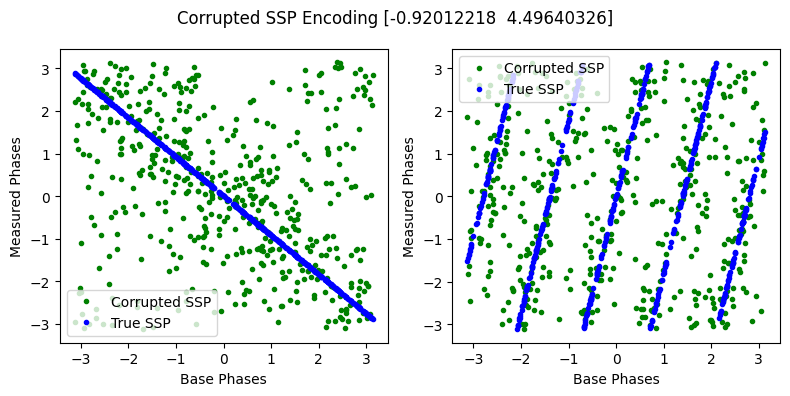

In [7]:
fig, ax = plt.subplots(1, x_dim, figsize=(4*x_dim,4))
fig.suptitle(f'Corrupted SSP Encoding {x}')
generate_ssp_phases_plot(A, ax, corrupted_ssp, x)
fig.tight_layout()

In [8]:
coupling_dist = np.pi / (2.*radius) / x_dim
couplings = couple_by_distribution(A, 10, inv_cdf=lambda u:scipy.stats.uniform.ppf(u, loc=-coupling_dist, scale=2*coupling_dist))

In [9]:
estimates, iterations = csim_method(corrupted_ssp, A, couplings,
                          kappas=[50, 0.5],
                          scaling=True,
                          verbose=True)
final_xest = estimates[-1]
print(f'True Location: {x}')
print(f'Iterations for Coupled Objective: {iterations[0]} (Estimate {estimates[0]})')
print(f'Iterations for Direct Objective: {iterations[1]} (Estimate {estimates[1]})')

Iter 0: x estimate [-0.54669426  1.52143527]
Iter 1: x estimate [-0.88770662  3.13344917]
Iter 2: x estimate [-0.98991939  4.14743172]
Iter 3: x estimate [-0.99266696  4.53637182]
Iter 4: x estimate [-0.98271991  4.67078513]
Iter 5: x estimate [-0.97585897  4.71794688]
Iter 6: x estimate [-0.97231567  4.73472958]
Iter 7: x estimate [-0.97067279  4.74075082]
Iter 8: x estimate [-0.96995316  4.74292284]
Iter 9: x estimate [-0.9696489   4.74370969]
Iter 0: x estimate [-0.94346976  4.6244753 ]
Iter 1: x estimate [-0.93285723  4.57059979]
Iter 2: x estimate [-0.92921471  4.54827416]
Iter 3: x estimate [-0.92804471  4.5391888 ]
Iter 4: x estimate [-0.92769025  4.5355029 ]
Iter 5: x estimate [-0.92759189  4.53400776]
Iter 6: x estimate [-0.92756901  4.533401  ]
True Location: [-0.92012218  4.49640326]
Iterations for Coupled Objective: 9 (Estimate [-0.9696489   4.74370969])
Iterations for Direct Objective: 6 (Estimate [-0.92756901  4.533401  ])


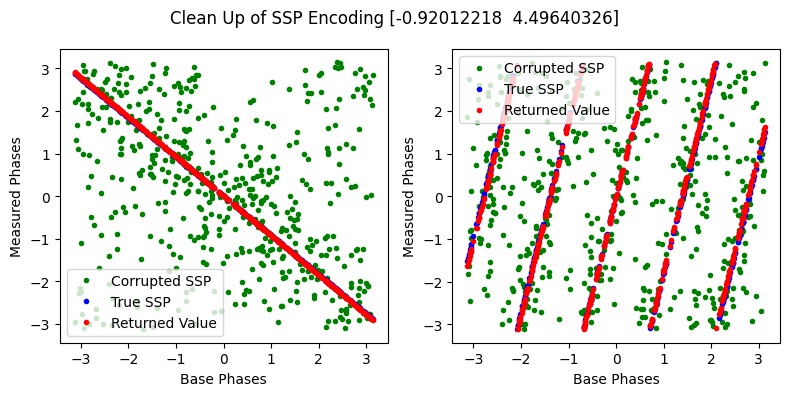

In [10]:
fig, ax = plt.subplots(1, x_dim, figsize=(4*x_dim,4))
fig.suptitle(f'Clean Up of SSP Encoding {x}')
generate_ssp_phases_plot(A, ax, corrupted_ssp, x, est_locs=final_xest, plot_true=True)
fig.tight_layout()


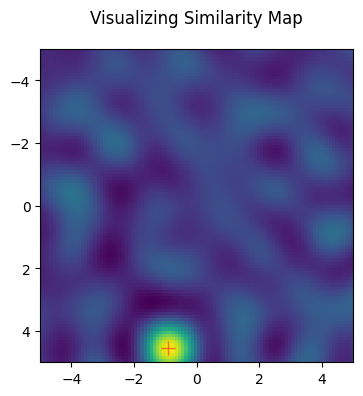

In [11]:
if x_dim <= 2:
    fig, ax = plt.subplots(1, 1, figsize=(4*x_dim,4))
    fig.suptitle(f'Visualizing Similarity Map')
    generate_ssp_similarity_plot(A, ax, corrupted_ssp, xest=final_xest, xrange=[-radius, radius])
    fig.tight_layout()

## Clean Up SSP Corrupted by Bundling

In [12]:
num_in_bundle = 5
A, corrupted_ssp, cleaned_ssp, x = get_corrupted_ssp(N, x_dim, loc_bds=radius, corruption_method='bundle', noise=num_in_bundle)

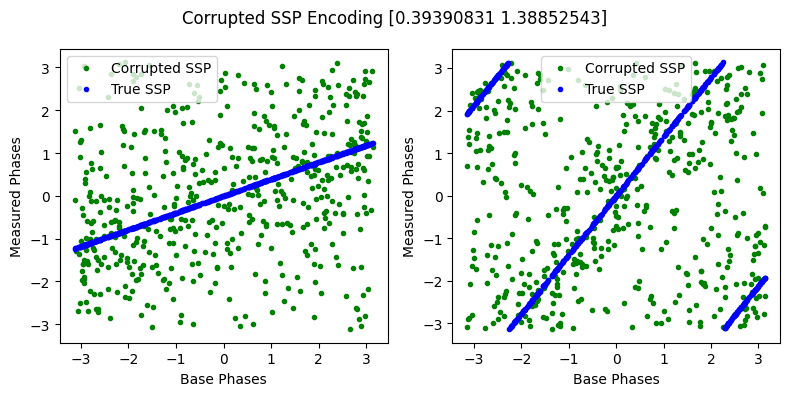

In [13]:
fig, ax = plt.subplots(1, x_dim, figsize=(4*x_dim,4))
fig.suptitle(f'Corrupted SSP Encoding {x}')
generate_ssp_phases_plot(A, ax, corrupted_ssp, x)
fig.tight_layout()

In [14]:
coupling_dist = np.pi / (2.*radius) / x_dim
couplings = couple_by_distribution(A, 10, inv_cdf=lambda u:scipy.stats.uniform.ppf(u, loc=-coupling_dist, scale=2*coupling_dist))

In [15]:
estimates, iterations = csim_method(corrupted_ssp, A, couplings,
                          kappas=[50, 0.5],
                          scaling=True,
                          verbose=True)
final_xest = estimates[-1]
print(f'True Location: {x}')
print(f'Iterations for Coupled Objective: {iterations[0]} (Estimate {estimates[0]})')
print(f'Iterations for Direct Objective: {iterations[1]} (Estimate {estimates[1]})')

Iter 0: x estimate [0.20096332 0.48493408]
Iter 1: x estimate [0.32065715 0.7842654 ]
Iter 2: x estimate [0.3892627  0.96145224]
Iter 3: x estimate [0.42801379 1.065043  ]
Iter 4: x estimate [0.44980312 1.12546429]
Iter 5: x estimate [0.46204849 1.16071625]
Iter 6: x estimate [0.46893747 1.18129717]
Iter 7: x estimate [0.47281961 1.19331875]
Iter 8: x estimate [0.47501158 1.20034263]
Iter 9: x estimate [0.47625173 1.20444693]
Iter 10: x estimate [0.4769548  1.20684521]
Iter 11: x estimate [0.47735418 1.20824653]
Iter 12: x estimate [0.47758147 1.20906525]
Iter 0: x estimate [0.44272457 1.30881998]
Iter 1: x estimate [0.42927645 1.35845054]
Iter 2: x estimate [0.42545058 1.38128579]
Iter 3: x estimate [0.42468803 1.39164926]
Iter 4: x estimate [0.42470035 1.39636183]
Iter 5: x estimate [0.42483248 1.39851388]
Iter 6: x estimate [0.42493657 1.39950031]
True Location: [0.39390831 1.38852543]
Iterations for Coupled Objective: 12 (Estimate [0.47758147 1.20906525])
Iterations for Direct Obje

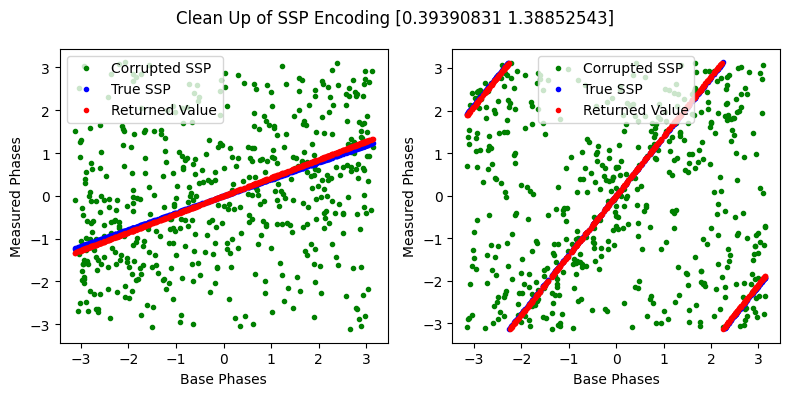

In [16]:
fig, ax = plt.subplots(1, x_dim, figsize=(4*x_dim,4))
fig.suptitle(f'Clean Up of SSP Encoding {x}')
generate_ssp_phases_plot(A, ax, corrupted_ssp, x, est_locs=final_xest, plot_true=True)
fig.tight_layout()


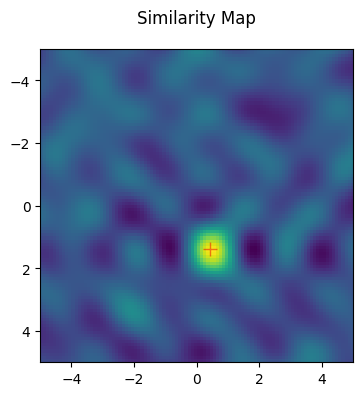

In [17]:
if x_dim <= 2:
    fig, ax = plt.subplots(1, 1, figsize=(4*x_dim,4))
    fig.suptitle(f'Similarity Map')
    generate_ssp_similarity_plot(A, ax, corrupted_ssp, xest=final_xest, xrange=[-radius, radius])
    fig.tight_layout()